<a id='top'></a>

<a id='top'></a>

# Social Structure Measurements

<br>

 <center> <img src=img/social_structure.png  width=60%> </center>  

 
#### Goal: Demonstrate the SocialSim social structure measurements
 
### <a href='#intro'> 1) Intro to constructing social networks</a>
 
### <a href='#data'> 2) Imports and data loading</a>

### <a href='#graphs'> 3) Visualizing the networks</a>

### <a href='#meas'> 4) Measuring properties of the social structure</a>

### <a href='#bonus'> 6) Bonus Exercise </a>

<a id='intro'></a>

### Constructing social networks
[Jump to top](#top)

The social ties between users both within and across social networks determines the pathways by which information is likely to spread from one user to another. Social structure can be defined on a social platform based on a number of different approaches including:
1. **Follower relationships among users**: Many social platforms offer a "follow"-type interaction where one user can indicate which other users they are interested in seeing content from. This includes the follower relationship on Twitter, the friend relationship on Facebook, and the Watch action on GitHub.
2. **Group relationships among users**: Some social platforms have a mechnism that allow users to form groups or communities. Shared group membership can indicate a relationship among a pair of users.  For example, users who subscribe to the same subreddit on Reddit, contribute to the same repo on GitHub, or are members of the same channel or group on Telegram may have a social connection. 
3. **Observed social interactions between users**: Users that interact often can be considered to have a social connection on the platform. This type of network construction has been shown to better represent the current social relationships among users than the underlying follower network.

<img src="img/social_structure_reconstruction.png?1" width="800"/>

Such an interaction-based network has several advantages for probing the social structure on a social platform:
1. **Dynamic networks**: User interactions better reflect *current* state of user relationships, whereas follower data may be outdated because people will follow new users but will rarely unfollow old ones.  Using the social structure revealed by interactions, we can study how social connections vary over time.
2. **Context-specific networks**: By comparing social interactions related to specific topics or events, we can reveal how a user's social connections may be context dependent. For example, a user's social connections related to their hobbies may be completely different than their professional social connections.  This would be revealed by differing connections that are observed in discussions of the different topics.
3. **Connection strength**: While a follower relationship is binary, an interaction networks allows us to study the strength of a relationship between two users as parameterized by the frequency of their interactions.


When constructing such a social network, we must decide what to include as an interaction between two users.  This will depend on the interaction mechanisms enabled by the platform in question as well as which of these interaction types are observable. For example, in Twitter we could add a connection between UserA and UserB if:
1. UserA retweets UserB
2. UserA quotes UserB
3. UserA replies to UserB
4. UserA mentions UserB


<a id='data'></a>

### Imports 
[Jump to top](#top)

In [19]:
import warnings
warnings.simplefilter('ignore')
warnings.filterwarnings('ignore')

import socialsim as ss
from matplotlib import pyplot as plt
%matplotlib inline

###  Load the dataset

For this example, we will study the social interactions related to discussion of a selected set of prominent software vulnerabilites across three platforms - Twitter, GitHub, and Reddit.

1.**CVE-2015-1805**
<img src="img/cve-2015-1805.png?1" width="500"/>
2.**CVE-2016-5195**
<img src="img/cve-2016-5195.png?1" width="500"/>
3.**CVE-2017-0199**
<img src="img/cve-2017-0199.png?1" width="600"/>


In [20]:
dataset_path = '../data/tutorial_social-structure.json'
dataset = ss.load_data(dataset_path, verbose=False)
dataset.head()

,actionType,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,comment,CVE-2015-1805,t1_211bjV53KQ7ZFfgw9iEm1Q,2016-03-19 09:23:09,8EmGX5vN0-f_LfveaZ6EtA,t1_BtPCSWfYHeXRfBgVf8ol3w,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
1,comment,CVE-2015-1805,t1_oNat_wyGlxlQq5i24fufaw,2016-03-19 09:33:43,dWrkaIdRIFdWHh5jWFDOhQ,t1_OQd6rU-E-XkVzE84XSvDrg,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
2,comment,CVE-2015-1805,t1_gawjEmWT-OBPo71M4-qkmw,2016-03-19 09:54:17,OLoWgl4RsMb5th2FVJSnCg,t1_BtPCSWfYHeXRfBgVf8ol3w,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
3,comment,CVE-2015-1805,t1_2Q6bxRIaPm1VK3YiR0y-pA,2016-03-19 10:20:42,wogTiLecTJeXaT7assQHrw,t1_OQd6rU-E-XkVzE84XSvDrg,reddit,t3_8tRvW0bjtsh0_yob-mLIUA
4,comment,CVE-2015-1805,t1_lgRG77dtt0dpcgdffqlcMA,2016-03-19 11:32:07,QxuYUlJPjSDylgAyP5fm6g,t1_BtPCSWfYHeXRfBgVf8ol3w,reddit,t3_8tRvW0bjtsh0_yob-mLIUA


<a id='graphs'></a>

### Instantiate measurement object
[Jump to top](#top)

Here we will read in the data and build the network structure.  

The arguments are:
1. **dataset**: The input data
4. **platform name**: Possible values are currently "twitter", "reddit", "github", and "telegram".  This is used to select the correct network construction method.
5. **plot_graph**: Boolean indicating whether to generate a graph visualization of the network.  The visualiation will be stored in self.graph.


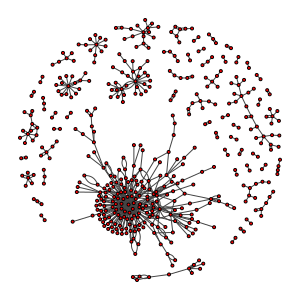

In [21]:
social_structure_reddit = ss.SocialStructureMeasurements(dataset[dataset['platform'] == 'reddit'], 
                                                         'reddit', 
                                                         plot_graph=True)
social_structure_reddit.graph



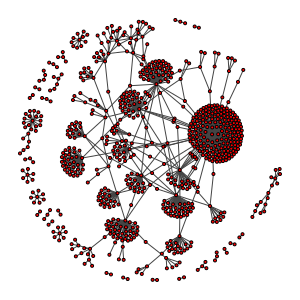

In [22]:
social_structure_twitter = ss.SocialStructureMeasurements(dataset[dataset['platform'] == 'twitter'], 
                                                          'twitter',
                                                          plot_graph=True)
social_structure_twitter.graph



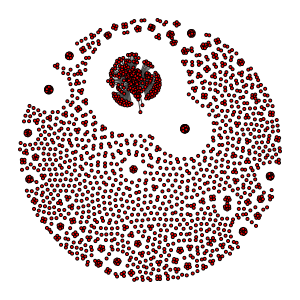

In [23]:
social_structure_github = ss.SocialStructureMeasurements(dataset[dataset['platform'] == 'github'],  
                                                         'github', 
                                                         plot_graph=True)
social_structure_github.graph


Compared with Twitter and Reddit, we find that the GitHub network has many small densely connected components. This reflects the fundamentally different team structure of interactions on GitHub.

<a id='properties'></a>

### Measuring properties of social structure
[Jump to top](#top)

* Simple network size meausures:
    * **Number of nodes**: How users are active in the interactions data?
    * **Number of edges**: How many social relationships between users are observed?
    * **Number of connected components**: How many isolated social sub-structures exist in the interactions data?
    * **Largest connected component**: How many users are connected in the largest such substructure?
* Network structure measures:
    * **Assortativity coefficient**: Pearson correlation coefficient of degree between pairs of linked nodes. Ranges from -1 to +1.  Higher values indicate that users tend to be connected to other users with a similar node degree to themselves. 
![title](img/Scale-free_networks_for_different_degrees_of_assortativity.jpg)
    * **Average clustering coeffient**: Measures whether the nodes within a node's neighborhood tend to also be connected to each other. Specifically, calculated using the ratio of number of triangles present to that of the total possible triangles for each node, averaged over all nodes.
<img src="img/clustering_coefficient.png?1" width="600"/>
    * **Community modularity**: Clauset-Newman-Moore modularity that measures how strongly the network resolves into communities or modules. Measures whether there are many connections within communities but only few in between. Ranges from -1 to +1.
![title](img/network_communities.png)

<a id='meas'></a>

### Run individual measurements

[Jump to top](#top)

Once we have constructed the social networks based on the observed user interactions, we can measure properties of the network.

**How many social connections are observed on each platform?**

In [24]:
print('Reddit: {}'.format(social_structure_reddit.number_of_edges()))
print('Twitter: {}'.format(social_structure_twitter.number_of_edges()))
print('GitHub: {}'.format(social_structure_github.number_of_edges()))

Reddit: 595
Twitter: 809
GitHub: 5050


**What is the average clustering coefficient of the network?**

In [25]:
print('Reddit: {}'.format(social_structure_reddit.assortativity_coefficient()))
print('Twitter: {}'.format(social_structure_twitter.assortativity_coefficient()))
print('GitHub: {}'.format(social_structure_github.assortativity_coefficient()))

Reddit: -0.1907215366356499
Twitter: -0.2684876732612384
GitHub: 0.526428705229599


**What is the average node degree within the network?**

In [26]:
print('Reddit: {}'.format(social_structure_reddit.mean_node_degree()))
print('Twitter: {}'.format(social_structure_twitter.mean_node_degree()))
print('GitHub: {}'.format(social_structure_github.mean_node_degree()))

Reddit: 2.5105485232067513
Twitter: 2.0664112388250317
GitHub: 5.735377626348665


**What is the distribution of node degrees within the network?**

In [27]:
reddit_dist = social_structure_reddit.degree_distribution()
twitter_dist = social_structure_twitter.degree_distribution()
github_dist = social_structure_github.degree_distribution()

github_dist.head()

,node,value
0,-4ut06b_OpsGXyXAfhmtYA/xYS8hbxY1ZhDNULnTi12rQ,130
1,ayTw22qf3F0wgNxGt5ghhA/L0A5BncSN1wrh09C6g3XOg,45
2,2YzVcEU5XvJXobTU6swknA/k7FG0h073IY1g2-KEbpiuQ,43
3,nW_3unTbI9Lznlh025z1NQ/Mb06GlkvfKdgum683EsbRw,43
4,rly9aKckMLrJf_EHytLAnA/k7FG0h073IY1g2-KEbpiuQ,16


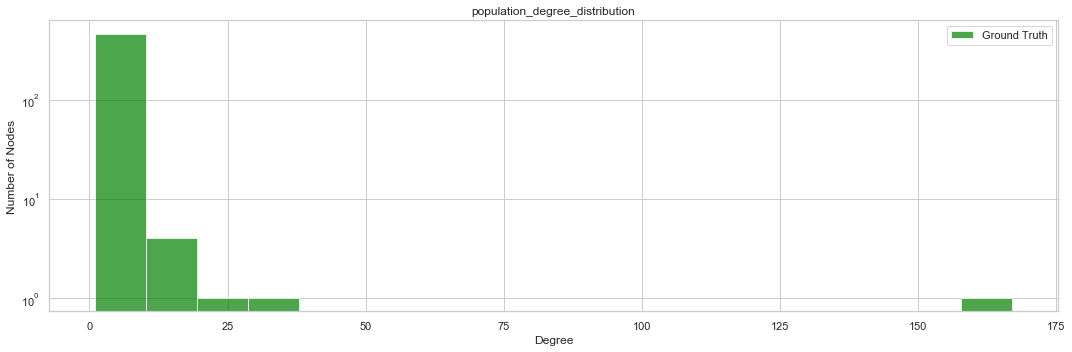

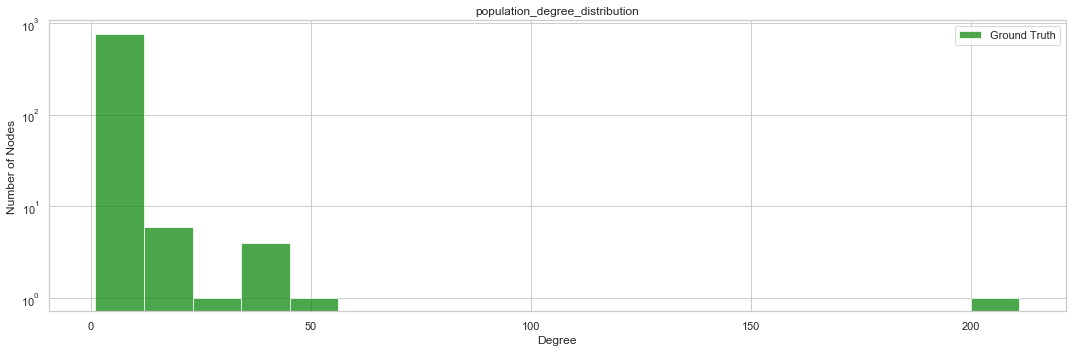

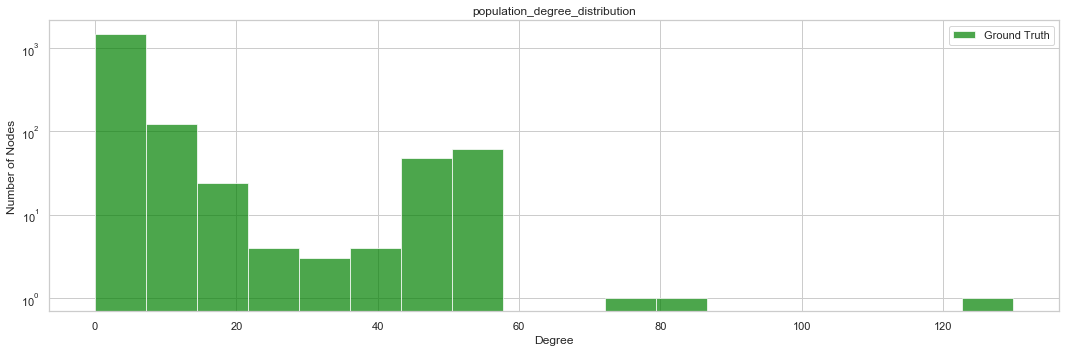

In [28]:
ss.generate_plot(reddit_dist,
                measurement_name='population_degree_distribution',
                show=True,
                logy=True)
ss.generate_plot(twitter_dist,
                measurement_name='population_degree_distribution',
                show=True,
                logy=True)
ss.generate_plot(github_dist,
                measurement_name='population_degree_distribution',
                show=True,
                logy=True)

<a id='bonus'></a>

### Bonus excerise:

Given the following dataset of discussion of the NotPetya malware, construct the Reddit and Twitter social structure networks and compare the clustering coefficients of the two platforms.

In [53]:
dataset_path = '../data/tutorial_social-structure_bonus.json'
dataset = ss.load_data(dataset_path, verbose=False)
dataset.head()


,actionType,informationID,nodeID,nodeTime,nodeUserID,parentID,platform,rootID
0,comment,notpetya,t1_Kvt5ISYJYRVmXmkUf_jtKw,2017-06-27 17:01:59,jaxvcAeAVnnPFfryGCaZHg,t3_qOngueFVhUVPObBT6hO1gg,reddit,t3_qOngueFVhUVPObBT6hO1gg
1,comment,notpetya,t1_9n33AAi4WF9woszGcPtMSw,2017-06-27 17:02:20,U8fGtnNLwqFZsbKnqkdCPg,t3_qOngueFVhUVPObBT6hO1gg,reddit,t3_qOngueFVhUVPObBT6hO1gg
2,comment,notpetya,t1_E2q6s8rIftn5TRqCBfxHqw,2017-06-27 17:04:07,IInTEkJBqNVCkzrVPeNW4A,t3_qOngueFVhUVPObBT6hO1gg,reddit,t3_qOngueFVhUVPObBT6hO1gg
3,comment,notpetya,t1_Fkm1iSOIVWvTsXlUW8hA_A,2017-06-27 17:07:29,nyFaN-3OX5FVdoBdjt_S_A,t1_E2q6s8rIftn5TRqCBfxHqw,reddit,t3_qOngueFVhUVPObBT6hO1gg
4,comment,notpetya,t1_HSAOunx9sdxfTRT5mL9xIg,2017-06-27 17:08:29,ZPXmipsYrAnGPcBxmzjudQ,t3_qOngueFVhUVPObBT6hO1gg,reddit,t3_qOngueFVhUVPObBT6hO1gg


**Visualize the Twitter network**

**Visualize the Reddit network**

**Compare their average clustering coefficients**